In [1]:
import nltk
#.               Added sentence Tokenizer. Alemi 04/12/2020
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tag import pos_tag
import pandas as pd

In [2]:
import numpy as np
import pandas as pd
import os
import re

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

# Syntax Structure


In [4]:
rNews=pd.read_csv('RedditNews.csv')
rNews.tail()

,Date,News
73603,2008-06-08,b'Man goes berzerk in Akihabara and stabs ever...
73604,2008-06-08,b'Threat of world AIDS pandemic among heterose...
73605,2008-06-08,b'Angst in Ankara: Turkey Steers into a Danger...
73606,2008-06-08,"b""UK: Identity cards 'could be used to spy on ..."
73607,2008-06-08,"b'Marriage, they said, was reduced to the stat..."


In [5]:
ex=rNews["News"][0]

In [24]:
!pip install tensorflow

In [25]:
#!pip install tensorflow-gpu

In [26]:
!python -c 'import tensorflow as tf; print(tf.__version__)' 

2.2.0-dev20200409


In [27]:
import tensorflow as tf

In [28]:
##  create a graph
g=tf.Graph()

In [29]:
#!tf_upgrade_v2 \
#  --intree my_project/ \
#  --outtree my_project_v2/ \
#  --reportfile report.txt

In [30]:
# In general, when we develop a model in the TensorFlow low-level API, we need to define placeholders for input data
# (x,y, and sometimes other tunable parameters); then, define the weight matrices and build 
# the model from input to output.
#  TensorFlow will create a graph that contains all the symbols that we have defines as nodes in this graph

In [45]:
import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior() 

In [46]:
@tf.function
def add(a, b):
  return a + b

add(tf.ones([2, 2]), tf.ones([2, 2]))  #  [[2., 2.], [2., 2.]]

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


<tf.Tensor 'PartitionedCall_1:0' shape=(2, 2) dtype=float32>

In [54]:

with g.as_default():
    x = tf.placeholder(dtype=tf.float32,
                       shape=(None), name='x')
    w = tf.Variable(2.0, name='weight')

In [55]:
b = tf.Variable(0.7, name='bias')

In [56]:
init= tf.initialize_all_variables()

In [57]:
#init = tf.global_variables_initializer()


In [58]:
z=w*x + b

ValueError: Tensor("bias_3:0", shape=(), dtype=float32_ref) must be from the same graph as Tensor("mul_4:0", dtype=float32) (graphs are <tensorflow.python.framework.ops.Graph object at 0x10aefb810> and <tensorflow.python.framework.ops.Graph object at 0x10aef9910>).

In [52]:
## create a session and pass in graph g
with tf.Session(graph=g) as sess:
    ## initialize w and b:
    sess.run(init)
    ## evaluate z:
    for t in [1.0, 0.6, -1.8]:
        print('x=%4.1f --> z=%4.1f'%(
        t, sess.run(z, feed_dict={x:t})))

ValueError: Fetch argument <tf.Operation 'init_2' type=NoOp> cannot be interpreted as a Tensor. (Operation name: "init_2"
op: "NoOp"
input: "^bias/Assign"
input: "^bias_1/Assign"
input: "^bias_2/Assign"
 is not an element of this graph.)

In [53]:
print(ex)

A 117-year-old woman in Mexico City finally received her birth certificate, and died a few hours later. Trinidad Alvarez Lira had waited years for proof that she had been born in 1898.


In [7]:
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(2,2))
#vectorizer = CountVectorizer(ngram_range=(2,2))

In [39]:
text = nltk.sent_tokenize(ex)
print(text)

['A 117-year-old woman in Mexico City finally received her birth certificate, and died a few hours later.', 'Trinidad Alvarez Lira had waited years for proof that she had been born in 1898.']


In [40]:
for i in nltk.sent_tokenize(ex):
    print(i)

A 117-year-old woman in Mexico City finally received her birth certificate, and died a few hours later.
Trinidad Alvarez Lira had waited years for proof that she had been born in 1898.


In [23]:
for i in nltk.word_tokenize(ex):
    print(i)

A
117-year-old
woman
in
Mexico
City
finally
received
her
birth
certificate
,
and
died
a
few
hours
later
.
Trinidad
Alvarez
Lira
had
waited
years
for
proof
that
she
had
been
born
in
1898
.


In [24]:
# Then we apply word tokenization and part-of-speech tagging to the sentence.
def preprocess(sent):
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent

In [25]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/piruzalemi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/piruzalemi/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [26]:
# We get a list of tuples containing the individual words in the sentence and their associated part-of-speech.
sent = preprocess(ex)
sent

[('A', 'DT'),
 ('117-year-old', 'JJ'),
 ('woman', 'NN'),
 ('in', 'IN'),
 ('Mexico', 'NNP'),
 ('City', 'NNP'),
 ('finally', 'RB'),
 ('received', 'VBD'),
 ('her', 'PRP'),
 ('birth', 'NN'),
 ('certificate', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('died', 'VBD'),
 ('a', 'DT'),
 ('few', 'JJ'),
 ('hours', 'NNS'),
 ('later', 'RB'),
 ('.', '.'),
 ('Trinidad', 'NNP'),
 ('Alvarez', 'NNP'),
 ('Lira', 'NNP'),
 ('had', 'VBD'),
 ('waited', 'VBN'),
 ('years', 'NNS'),
 ('for', 'IN'),
 ('proof', 'NN'),
 ('that', 'IN'),
 ('she', 'PRP'),
 ('had', 'VBD'),
 ('been', 'VBN'),
 ('born', 'VBN'),
 ('in', 'IN'),
 ('1898', 'CD'),
 ('.', '.')]

Now we’ll implement noun phrase chunking to identify named entities using a regular expression consisting of rules that indicate how sentences should be chunked.
Our chunk pattern consists of one rule, that a noun phrase, NP, should be formed whenever the chunker finds an optional determiner, DT, followed by any number of adjectives, JJ, and then a noun, NN.

In [27]:
pattern = 'NP: {<DT>?<JJ>*<NN>}'

In [28]:
cp = nltk.RegexpParser(pattern)
cs = cp.parse(sent)
print(cs)

(S
  (NP A/DT 117-year-old/JJ woman/NN)
  in/IN
  Mexico/NNP
  City/NNP
  finally/RB
  received/VBD
  her/PRP
  (NP birth/NN)
  (NP certificate/NN)
  ,/,
  and/CC
  died/VBD
  a/DT
  few/JJ
  hours/NNS
  later/RB
  ./.
  Trinidad/NNP
  Alvarez/NNP
  Lira/NNP
  had/VBD
  waited/VBN
  years/NNS
  for/IN
  (NP proof/NN)
  that/IN
  she/PRP
  had/VBD
  been/VBN
  born/VBN
  in/IN
  1898/CD
  ./.)


# Chunker

The output can be read as a tree or a hierarchy with S as the first level, denoting sentence. we can also display it graphically.

# 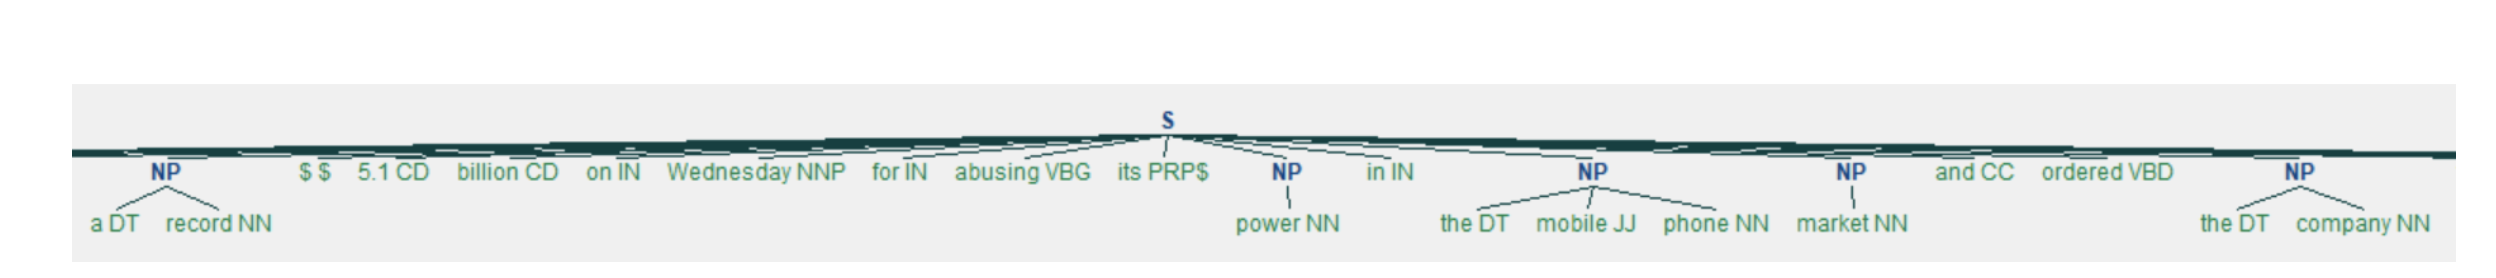

In [29]:
from nltk.chunk import conlltags2tree, tree2conlltags
from pprint import pprint
iob_tagged = tree2conlltags(cs)
pprint(iob_tagged)

[('A', 'DT', 'B-NP'),
 ('117-year-old', 'JJ', 'I-NP'),
 ('woman', 'NN', 'I-NP'),
 ('in', 'IN', 'O'),
 ('Mexico', 'NNP', 'O'),
 ('City', 'NNP', 'O'),
 ('finally', 'RB', 'O'),
 ('received', 'VBD', 'O'),
 ('her', 'PRP', 'O'),
 ('birth', 'NN', 'B-NP'),
 ('certificate', 'NN', 'B-NP'),
 (',', ',', 'O'),
 ('and', 'CC', 'O'),
 ('died', 'VBD', 'O'),
 ('a', 'DT', 'O'),
 ('few', 'JJ', 'O'),
 ('hours', 'NNS', 'O'),
 ('later', 'RB', 'O'),
 ('.', '.', 'O'),
 ('Trinidad', 'NNP', 'O'),
 ('Alvarez', 'NNP', 'O'),
 ('Lira', 'NNP', 'O'),
 ('had', 'VBD', 'O'),
 ('waited', 'VBN', 'O'),
 ('years', 'NNS', 'O'),
 ('for', 'IN', 'O'),
 ('proof', 'NN', 'B-NP'),
 ('that', 'IN', 'O'),
 ('she', 'PRP', 'O'),
 ('had', 'VBD', 'O'),
 ('been', 'VBN', 'O'),
 ('born', 'VBN', 'O'),
 ('in', 'IN', 'O'),
 ('1898', 'CD', 'O'),
 ('.', '.', 'O')]


In this representation, there is one token per line, each with its part-of-speech tag and its named entity tag. Based on this training corpus, we can construct a tagger that can be used to label new sentences; and use the nltk.chunk.conlltags2tree() function to convert the tag sequences into a chunk tree.

With the function nltk.ne_chunk(), we can recognize named entities using a classifier, the classifier adds category labels such as PERSON, ORGANIZATION, and GPE.

In [30]:
from nltk.chunk import conlltags2tree, tree2conlltags, ne_chunk
from pprint import pprint

In [31]:
import nltk
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/piruzalemi/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/piruzalemi/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [32]:

ne_tree = ne_chunk(pos_tag(word_tokenize(ex)))
print(ne_tree)

(S
  A/DT
  117-year-old/JJ
  woman/NN
  in/IN
  (GPE Mexico/NNP City/NNP)
  finally/RB
  received/VBD
  her/PRP
  birth/NN
  certificate/NN
  ,/,
  and/CC
  died/VBD
  a/DT
  few/JJ
  hours/NNS
  later/RB
  ./.
  (PERSON Trinidad/NNP Alvarez/NNP Lira/NNP)
  had/VBD
  waited/VBN
  years/NNS
  for/IN
  proof/NN
  that/IN
  she/PRP
  had/VBD
  been/VBN
  born/VBN
  in/IN
  1898/CD
  ./.)


In [33]:
# I thank Susan Li Senior Data Sicentist in Canada for her git hub code adapted to our data set...Please add
# to the rest, looping thru our documents and chuncking on S&P500 code!  Alemi. 04/09/2020 

In [34]:
import nltk
nltk.download('treebank')

[nltk_data] Downloading package treebank to
[nltk_data]     /Users/piruzalemi/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


True

In [35]:
from nltk.corpus import treebank
#t = treebank.parsed_sents('wsj_0001.mrg')[0]
#t.draw()

#### We also thank Ju chen who origianlly found & noted the code for us, on our question concerning NLTK & 
#### Syntax Structure.
####                                             Piruz Alemi 04/09/2020 + Team = Li Steve, Zhongping Yang, Mike Fonseca
